In [82]:
import pandas
df = pandas.read_csv("C:\development\\repositories\clicktt-web-scraper\data\\tt-data.csv", sep="\t")
df['Datum'] = pandas.to_datetime(df['Datum'],format="%Y.%m.%d") #konvertiere Datumsspalte von String zu datetime
df['Spielklasse'] = df['Spielklasse'].astype("category")
df.info()
df.sort_values(by=['Datum'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   vs              215 non-null    object        
 1   Gegner          215 non-null    object        
 2   Spielklasse     215 non-null    category      
 3   Datum           215 non-null    datetime64[ns]
 4   Verein          215 non-null    object        
 5   Satz 1 Spieler  215 non-null    int64         
 6   Satz 1 Gegner   215 non-null    int64         
 7   Satz 2 Spieler  215 non-null    int64         
 8   Satz 2 Gegner   215 non-null    int64         
 9   Satz 3 Spieler  214 non-null    float64       
 10  Satz 3 Gegner   214 non-null    float64       
 11  Satz 4 Spieler  111 non-null    float64       
 12  Satz 4 Gegner   111 non-null    float64       
 13  Satz 5 Spieler  44 non-null     float64       
 14  Satz 5 Gegner   44 non-null     float64       
 15  Sätze 

In [83]:
df['Total Balls Spieler'] = df[['Satz 1 Spieler', 'Satz 2 Spieler', 'Satz 3 Spieler', 'Satz 4 Spieler', 'Satz 5 Spieler']].sum(axis = 1)
df['Total Balls Gegner'] = df[['Satz 1 Gegner', 'Satz 2 Gegner', 'Satz 3 Gegner', 'Satz 4 Gegner', 'Satz 5 Gegner']].sum(axis = 1)
df['Ratio Balls'] = df['Total Balls Spieler'] / df['Total Balls Gegner']
df['Satzbilanz'] = df['Sätze Spieler'] - df['Sätze Gegner']
df.head(5)

,vs,Gegner,Spielklasse,Datum,Verein,Satz 1 Spieler,Satz 1 Gegner,Satz 2 Spieler,Satz 2 Gegner,Satz 3 Spieler,...,Satz 4 Spieler,Satz 4 Gegner,Satz 5 Spieler,Satz 5 Gegner,Sätze Spieler,Sätze Gegner,Total Balls Spieler,Total Balls Gegner,Ratio Balls,Satzbilanz
54,3−4,"Feldhaus, Ingelore",1. Kreisklasse,2016-09-23,SG Fichtenwalde II,8,11,12,14,3.0,...,NaN,NaN,NaN,NaN,0,3,23.0,36.0,0.638889,-3
56,3−1,"Martin, Herbert",1. Kreisklasse,2016-09-23,SG Fichtenwalde II,11,7,11,3,11.0,...,NaN,NaN,NaN,NaN,3,0,33.0,19.0,1.736842,3
55,3−3,"Otto, Katja",1. Kreisklasse,2016-09-23,SG Fichtenwalde II,11,6,11,8,11.0,...,NaN,NaN,NaN,NaN,3,0,33.0,20.0,1.650000,3
40,4−1,"Danielisz, Hans-Jürgen",2. Landesklasse,2016-09-24,Belziger SG Einheit,6,11,11,9,13.0,...,7.0,11.0,5.0,11.0,2,3,42.0,53.0,0.792453,-1
39,4−2,"Siebert, Heiko",2. Landesklasse,2016-09-24,Belziger SG Einheit,11,9,11,6,4.0,...,11.0,7.0,NaN,NaN,3,1,37.0,33.0,1.121212,2


array([<AxesSubplot:title={'center':'Ratio Balls'}, xlabel='Spielklasse'>,
       <AxesSubplot:title={'center':'Satzbilanz'}, xlabel='Spielklasse'>],
      dtype=object)

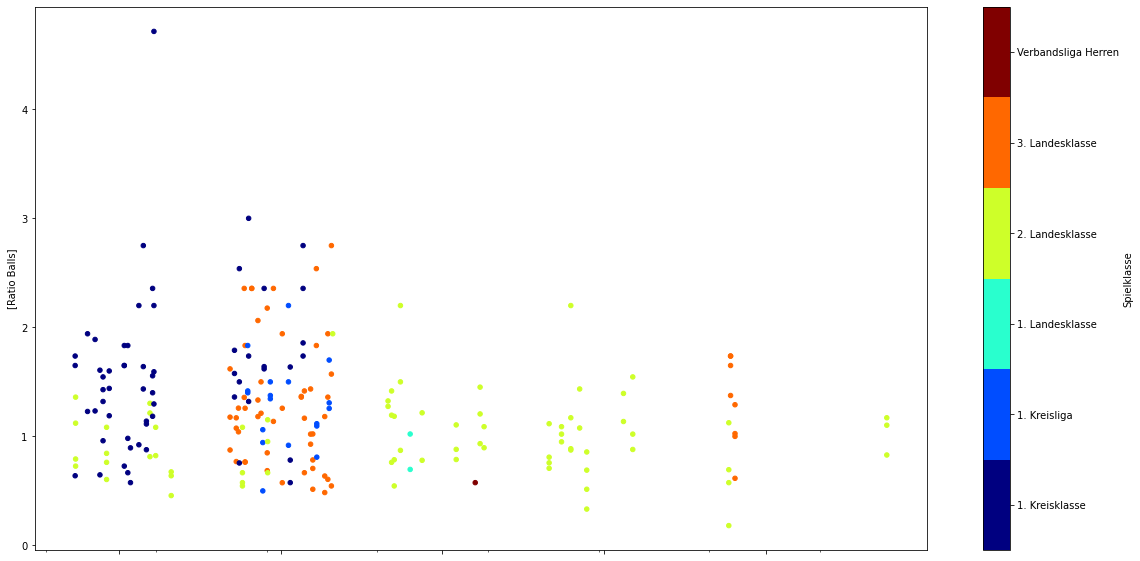

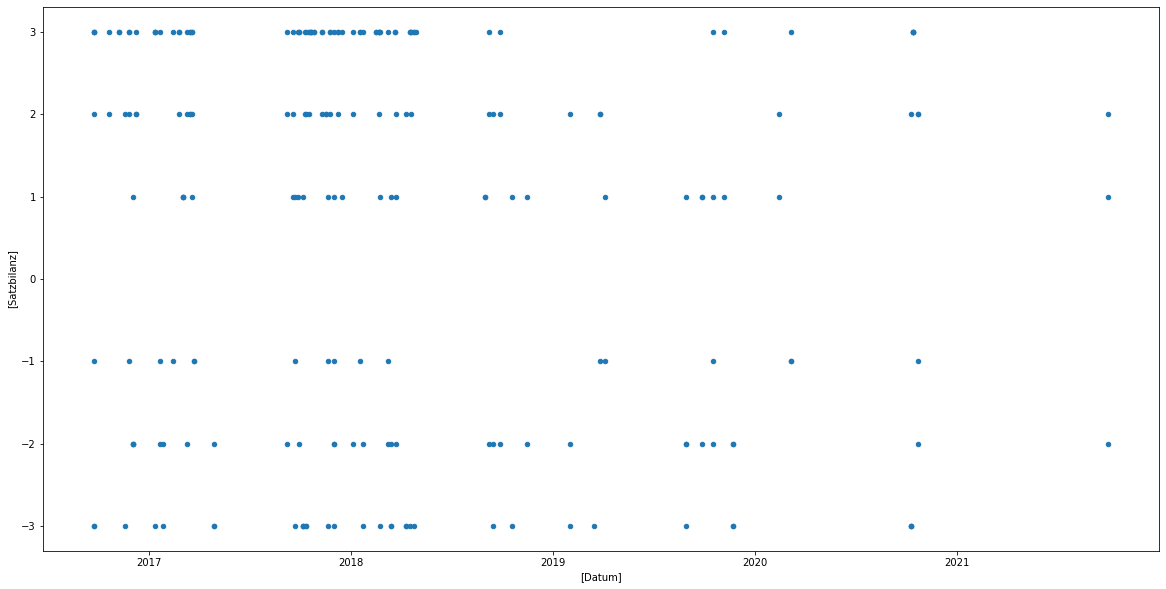

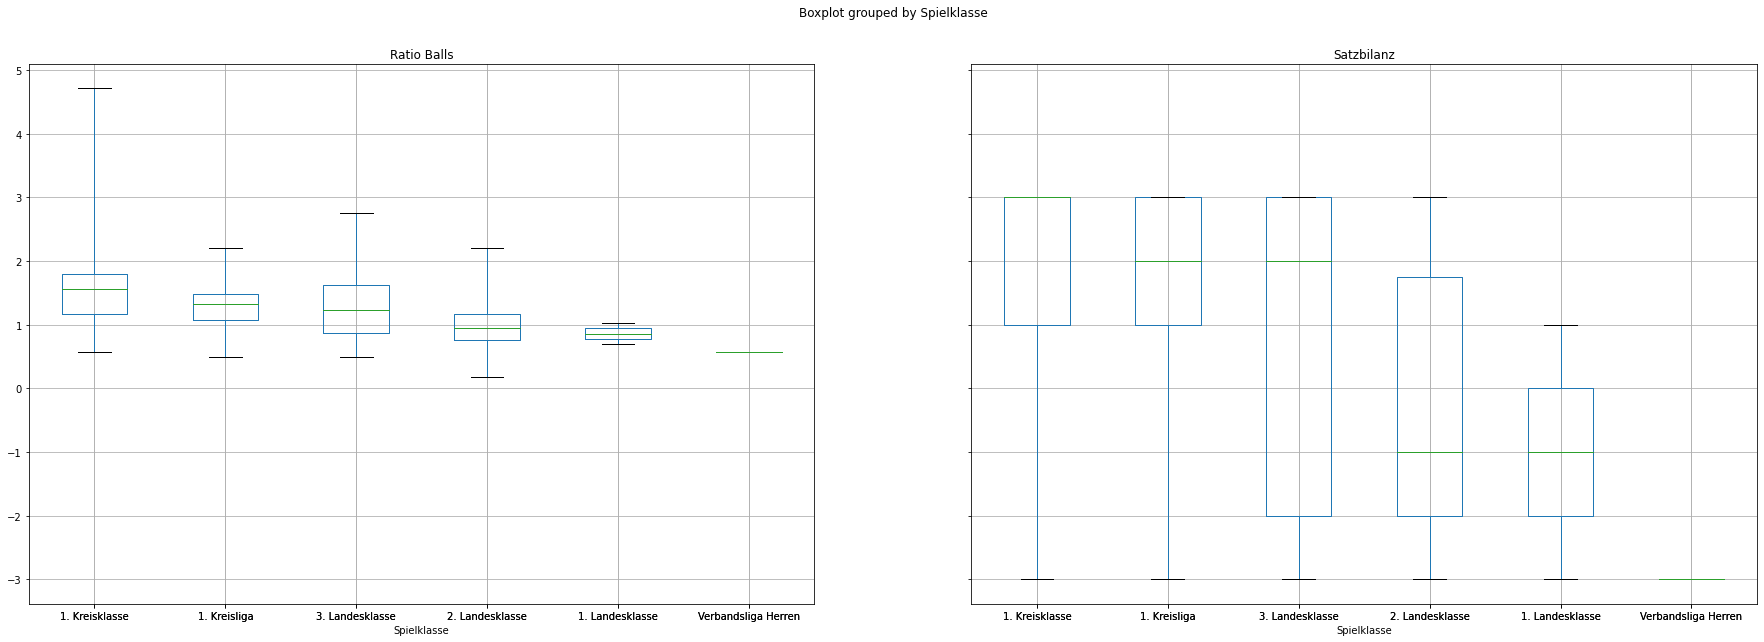

In [89]:
df.plot(x=['Datum'], y=['Ratio Balls'], kind='scatter', c='Spielklasse', colormap='jet', figsize=(20,10))
df.plot(x=['Datum'], y=['Satzbilanz'], kind='scatter', figsize=(20,10))

df.boxplot(column=['Ratio Balls', 'Satzbilanz'], by='Spielklasse', figsize=(30,10), whis=(0, 100), positions = [1,2,5,4,3,6])

# TODO: groupby Saison

# TODO: Spielklasse durch Färbung der Datenpunkte zeigen

In [54]:
df_daily = df.groupby(['Datum']).sum()
df_daily.head(6)

,Satz 1 Spieler,Satz 1 Gegner,Satz 2 Spieler,Satz 2 Gegner,Satz 3 Spieler,Satz 3 Gegner,Satz 4 Spieler,Satz 4 Gegner,Satz 5 Spieler,Satz 5 Gegner,Sätze Spieler,Sätze Gegner,Total Balls Spieler,Total Balls Gegner,Ratio Balls,Satzbilanz
Datum,,,,,,,,,,,,,,,,
2016-09-23,30,24,34,25,25.0,26.0,0.0,0.0,0.0,0.0,6,3,89.0,75.0,4.025731,3
2016-09-24,37,41,41,32,36.0,42.0,18.0,18.0,5.0,11.0,8,7,137.0,144.0,4.000938,1
2016-10-21,22,13,22,12,21.0,19.0,11.0,8.0,0.0,0.0,6,1,76.0,52.0,3.169748,5
2016-11-07,25,17,24,20,22.0,11.0,0.0,0.0,0.0,0.0,6,0,71.0,48.0,3.122222,6
2016-11-18,16,14,19,25,21.0,15.0,11.0,8.0,0.0,0.0,3,4,67.0,62.0,2.254202,-1
2016-11-25,40,31,38,37,44.0,35.0,22.0,9.0,11.0,13.0,11,4,155.0,125.0,5.254026,7


In [55]:
df_daily_cumsum = df_daily.cumsum()
df_daily_cumsum.head(6)

,Satz 1 Spieler,Satz 1 Gegner,Satz 2 Spieler,Satz 2 Gegner,Satz 3 Spieler,Satz 3 Gegner,Satz 4 Spieler,Satz 4 Gegner,Satz 5 Spieler,Satz 5 Gegner,Sätze Spieler,Sätze Gegner,Total Balls Spieler,Total Balls Gegner,Ratio Balls,Satzbilanz
Datum,,,,,,,,,,,,,,,,
2016-09-23,30,24,34,25,25.0,26.0,0.0,0.0,0.0,0.0,6,3,89.0,75.0,4.025731,3
2016-09-24,67,65,75,57,61.0,68.0,18.0,18.0,5.0,11.0,14,10,226.0,219.0,8.026669,4
2016-10-21,89,78,97,69,82.0,87.0,29.0,26.0,5.0,11.0,20,11,302.0,271.0,11.196417,9
2016-11-07,114,95,121,89,104.0,98.0,29.0,26.0,5.0,11.0,26,11,373.0,319.0,14.318639,15
2016-11-18,130,109,140,114,125.0,113.0,40.0,34.0,5.0,11.0,29,15,440.0,381.0,16.572840,14
2016-11-25,170,140,178,151,169.0,148.0,62.0,43.0,16.0,24.0,40,19,595.0,506.0,21.826866,21


<AxesSubplot:xlabel='Datum'>

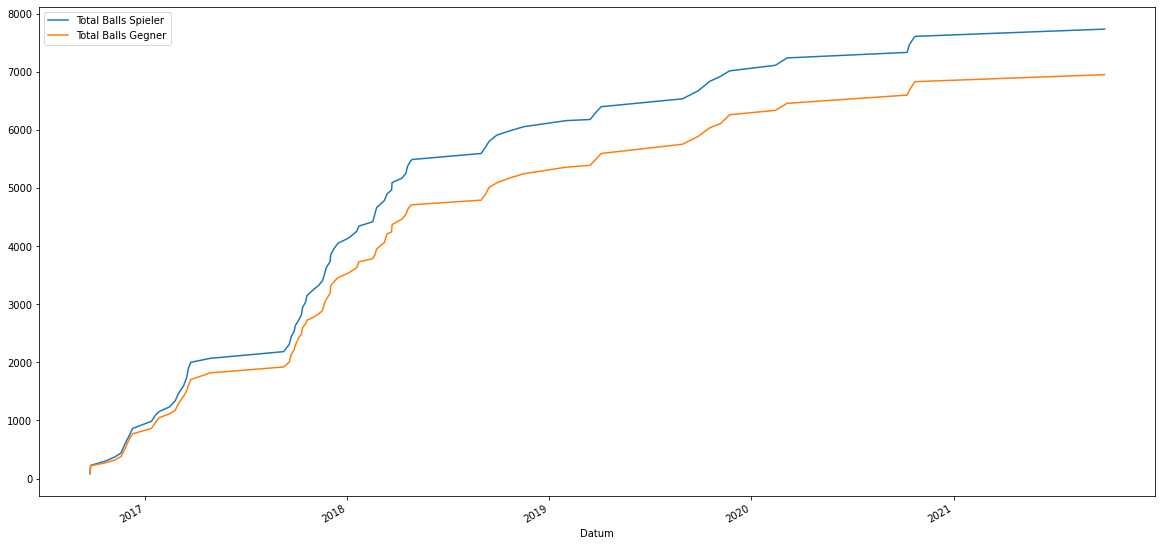

In [56]:
import matplotlib
df_daily_cumsum.plot(y=['Total Balls Spieler', 'Total Balls Gegner'], figsize=(20,10))